# Comparar los modelos de regresión L1, L2 y Elastic-Net
Vamos a crear un notebook para implementar ejemplos sencillos de los modelos de regresión L1, L2 y Elastic-Net.

Usaremos datos ya precargados de los precios de las casas en california.

1.  **Configuración e Importación de Librerías:**
    *   Se importan las librerías esenciales para el análisis: `numpy`, `pandas`, `matplotlib` y, por supuesto, `sklearn` para el modelado y preprocesamiento.

In [1]:
# First step is to install the required libraries. You can use the included "requirements.txt" file or install them manually
# Uncomment the the following two lines to install them.

#%pip install scikit-learn
#%pip install pandas
#%pip install matplotlib

# Load the dataset
import pandas as pd
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

# 

2. **Mostrar información del dataset, y explicar las columnas**

In [2]:
# Display the first few rows and info
print("First 5 rows of the dataset:")
display(df.head())
print("\nDataset Info:")
df.info()

# Explanation of columns
print("\nColumn Explanation:")
print("MedInc: Median income in block group")
print("HouseAge: Median house age in block group")
print("AveRooms: Average number of rooms per household")
print("AveBedrms: Average number of bedrooms per household")
print("Population: Block group population")
print("AveOccup: Average number of household members")
print("Latitude: Block group latitude")
print("Longitude: Block group longitude")
print("MedHouseVal: Median house value for California districts (Dependent Variable)")

First 5 rows of the dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB

Column Explanation:
MedInc: Median income in block group
HouseAge: Median house age in block group
AveRooms: Average number of rooms per household
AveBedrms: Average number of bedrooms per household
Population: Block group population
AveOccup: Average number of household members
Latitude: Block group latitude
Longitude: Block group longitude
MedHouseVal: Median house valu

3. **Identificar variables dependientes e independientes**

In [3]:
# Identify dependent and independent variables
dependent_variable = 'MedHouseVal'
independent_variables = housing.feature_names

print(f"\nDependent Variable: {dependent_variable}")
print(f"Independent Variables: {list(independent_variables)}")


Dependent Variable: MedHouseVal
Independent Variables: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


4. **Preparación de los datos.** Para ello, crearemos lo siguiente:
- Dataset para las variables dependientes
- Dataset para las variables independientes
- Preparar los datos de entrenamiento y de pruebas. Reservaremos un 20% de los datos en el dataset para ser usados como datos de prueba.
    - Variables dependientes para entrenar
    - Variables dependientes de prueba
    - Variables independientes para entrenar
    - Variables independientes de prueba

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
df_independent_variables = df[independent_variables]
df_dependent_variable = df[dependent_variable]
independent_train, independent_test, dependent_train, dependent_test = train_test_split(df_independent_variables, df_dependent_variable, test_size=0.2, random_state=42)

# Instantiate and fit the scaler to the training data
scaler = StandardScaler()
independent_train_scaled = scaler.fit_transform(independent_train)

# Transform both training and testing data
independent_test_scaled = scaler.transform(independent_test)

print("Independent variables scaled successfully.")

Independent variables scaled successfully.


5.  **Modelo 2: Regularización L1 (Lasso):**
    *   A continuación, se explora la Regresión Lasso. Su penalización L1 ($\alpha \sum |w_i|$) no solo reduce los coeficientes, sino que puede anular por completo los de las características menos relevantes. Esto convierte a Lasso en una poderosa herramienta para la **selección automática de características**, generando modelos más simples (dispersos).


In [5]:
from sklearn.linear_model import Lasso

# Instantiate a Lasso model
lasso_model = Lasso(alpha=0.2)

# Fit the Lasso model to the scaled training data
lasso_model.fit(independent_train_scaled, dependent_train)

# Print the coefficients of the trained Lasso model
print("Lasso Model Coefficients:")
print(lasso_model.coef_)

# Explanation: Lasso (L1) regression can set some coefficients exactly to zero,
# effectively discarding the corresponding independent variables from the model.
# The variables with coefficients of exactly 0 are considered discarded by the model.

Lasso Model Coefficients:
[ 0.59851956  0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]


6.  **Modelo 1: Regularización L2 (Ridge):**
    *   Se introduce la Regresión de Ridge, que combate el sobreajuste añadiendo una penalización L2 ($\alpha \sum w_i^2$). Esta penalización contrae los coeficientes hacia cero, mejorando la estabilidad del modelo, especialmente con multicolinealidad. A diferencia de Lasso, Ridge no anula completamente los coeficientes.


In [6]:
from sklearn.linear_model import Ridge

# Instantiate a Ridge model
ridge_model = Ridge(alpha=0.2)

# Fit the Ridge model to the scaled training data
ridge_model.fit(independent_train_scaled, dependent_train)

# Print the coefficients of the trained Ridge model
print("Ridge Model Coefficients:")
print(ridge_model.coef_)

# Explanation: Ridge regression shrinks the coefficients towards zero but does not set them exactly to zero.
# This means that no variables are completely discarded, although their impact on the prediction is reduced.

Ridge Model Coefficients:
[ 0.85437179  0.1225618  -0.29437018  0.33920917 -0.00230261 -0.04082989
 -0.8967765  -0.86968745]


7.  **Modelo 3: Regularización Elastic Net:**
    *   Elastic Net se presenta como la solución que combina lo mejor de ambos mundos. Su penalización es una mezcla de L1 y L2, lo que le permite realizar selección de características (como Lasso) y manejar eficazmente grupos de variables correlacionadas (una debilidad de Lasso).


In [7]:
from sklearn.linear_model import ElasticNet

# Instantiate an ElasticNet model
# Elastic-Net is a linear regression model with combined L1 and L2 priors as regularizer.
# alpha is a constant that multiplies the penalty terms and thus determines the degree of regularization.
# l1_ratio corresponds to the Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1.
# l1_ratio = 0 corresponds to L2 penalty, l1_ratio = 1 to L1 penalty.
elastic_net_model = ElasticNet(alpha=0.2, l1_ratio=0.5, random_state=42)

# Fit the ElasticNet model to the scaled training data
elastic_net_model.fit(independent_train_scaled, dependent_train)

# Print the coefficients of the trained ElasticNet model
print("Elastic-Net Model Coefficients:")
print(elastic_net_model.coef_)

# Explanation: Elastic-Net combines L1 (Lasso) and L2 (Ridge) regularization.
# The L1 penalty encourages sparsity, potentially setting some coefficients to zero (variable selection).
# The L2 penalty encourages smaller coefficients, shrinking them towards zero but rarely exactly to zero.
# The l1_ratio parameter controls the mix between L1 and L2. A ratio of 0.5 means an equal mix.
# This combination allows Elastic-Net to perform both variable selection and coefficient shrinkage.
# Variables with coefficients of exactly 0 are discarded, while others are shrunk.

Elastic-Net Model Coefficients:
[ 0.64386711  0.08940862 -0.         -0.         -0.         -0.
 -0.01498904 -0.        ]


8. **Grafica de resultados**
Se muestra una gráfica de los tres metodos entrenados con parametros aleatorios. Podemos observar que L2 (Ridge) nos esta dando valores negativos.

/home/vscode/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


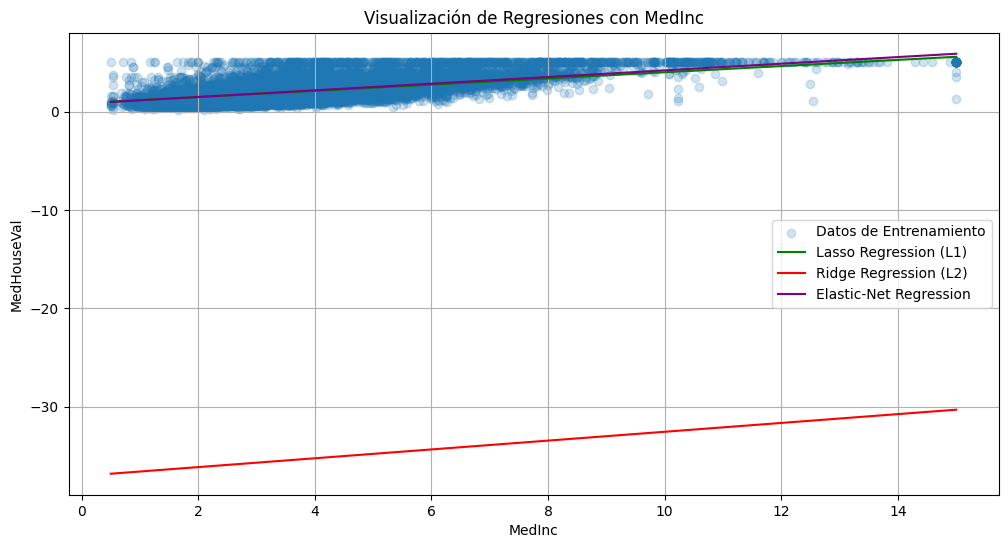

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Select a single feature for plotting (e.g., 'MedInc')
# You can change this to any other feature in independent_variables
feature_to_plot = 'MedInc'
feature_index = independent_variables.index(feature_to_plot)

# Get the scaled data for the selected feature
X_plot = independent_train_scaled[:, feature_index]

# Create a range of values for the selected feature to plot the regression line
# We need to unscale these values to match the original data scale for plotting
# To do this correctly for plotting with a single feature, we need to create a dummy array with the correct number of features (8)
# and fill it with the unscaled single feature data at the correct index.
dummy_array_unscaled = np.zeros((100, len(independent_variables)))
dummy_array_unscaled[:, feature_index] = np.linspace(independent_train[feature_to_plot].min(), independent_train[feature_to_plot].max(), 100)
X_plot_range = dummy_array_unscaled

# Scale the range for prediction
X_plot_range_scaled = scaler.transform(X_plot_range)

# Predict using each model
y_lasso_plot = lasso_model.predict(X_plot_range_scaled)
y_ridge_plot = ridge_model.predict(X_plot_range_scaled)
y_elastic_net_plot = elastic_net_model.predict(X_plot_range_scaled)

# Plot the original data and the regression lines
plt.figure(figsize=(12, 6))

# Scatter plot of the original data for the selected feature
plt.scatter(independent_train[feature_to_plot], dependent_train, alpha=0.2, label='Datos de Entrenamiento')


# Plot Lasso regression line
# We need to use the unscaled X_plot_range for plotting the regression lines to align with the scatter plot
plt.plot(X_plot_range[:, feature_index], y_lasso_plot, color='green', label='Lasso Regression (L1)')

# Plot Ridge regression line
plt.plot(X_plot_range[:, feature_index], y_ridge_plot, color='red', label='Ridge Regression (L2)')

# Plot Elastic-Net regression line
plt.plot(X_plot_range[:, feature_index], y_elastic_net_plot, color='purple', label='Elastic-Net Regression')

plt.xlabel(feature_to_plot)
plt.ylabel(dependent_variable)
plt.title(f'Visualización de Regresiones con {feature_to_plot}')
plt.legend()
plt.grid(True)
plt.show()

puse en chat gpt para que me eclpiacra el codigo y el me ha dado una opcion para mejorarlo.

comando que le puse y su respuesta:
commando:
estoy tratando de entere los Regresión Ridge (L2), Regresión Lasso (L1), elastic-net tengo aqui un trozo de codigo que me hace una grafica comparativa pero no llego a entenderlo me puedes explicar paso a paso todo el codigo. import matplotlib.pyplot as plt import numpy as np # Select a single feature for plotting (e.g., 'MedInc') # You can change this to any other feature in independent_variables feature_to_plot = 'MedInc' feature_index = independent_variables.index(feature_to_plot) # Get the scaled data for the selected feature X_plot = independent_train_scaled[:, feature_index] # Create a range of values for the selected feature to plot the regression line # We need to unscale these values to match the original data scale for plotting # To do this correctly for plotting with a single feature, we need to create a dummy array with the correct number of features (8) # and fill it with the unscaled single feature data at the correct index. dummy_array_unscaled = np.zeros((100, len(independent_variables))) dummy_array_unscaled[:, feature_index] = np.linspace(independent_train[feature_to_plot].min(), independent_train[feature_to_plot].max(), 100) X_plot_range = dummy_array_unscaled # Scale the range for prediction X_plot_range_scaled = scaler.transform(X_plot_range) # Predict using each model y_lasso_plot = lasso_model.predict(X_plot_range_scaled) y_ridge_plot = ridge_model.predict(X_plot_range_scaled) y_elastic_net_plot = elastic_net_model.predict(X_plot_range_scaled) # Plot the original data and the regression lines plt.figure(figsize=(12, 6)) # Scatter plot of the original data for the selected feature plt.scatter(independent_train[feature_to_plot], dependent_train, alpha=0.2, label='Datos de Entrenamiento') # Plot Lasso regression line # We need to use the unscaled X_plot_range for plotting the regression lines to align with the scatter plot plt.plot(X_plot_range[:, feature_index], y_lasso_plot, color='green', label='Lasso Regression (L1)') # Plot Ridge regression line plt.plot(X_plot_range[:, feature_index], y_ridge_plot, color='red', label='Ridge Regression (L2)') # Plot Elastic-Net regression line plt.plot(X_plot_range[:, feature_index], y_elastic_net_plot, color='purple', label='Elastic-Net Regression') plt.xlabel(feature_to_plot) plt.ylabel(dependent_variable) plt.title(f'Visualización de Regresiones con {feature_to_plot}') plt.legend() plt.grid(True) plt.show()

Perfecto — te lo explico paso a paso y luego te doy una versión mejorada y más robusta del código con recomendaciones prácticas para que la gráfica sea realmente interpretable. Iré mezclando explicación conceptual (qué hace cada trozo) con notas prácticas y un pequeño resumen matemático suave al final.

1) Resumen rápido de qué intenta hacer el código

El objetivo del código es comparar las predicciones de tres modelos (Lasso, Ridge y ElasticNet) respecto a un único predictor (MedInc) visualizando:

Los puntos reales (scatter) de entrenamiento (valor de MedInc vs. target).

Tres líneas (una por modelo) que muestran cómo cambia la predicción del target al variar MedInc manteniendo el resto de variables fijas (en el código original, a cero).

Para que esto funcione correctamente hay que:

Crear un rango de valores de MedInc en la escala original (no escalada).

Construir una matriz completa con todas las características (n_features) para poder pasarla al scaler y a los modelos (que esperan n_features).

Escalar esa matriz con el mismo scaler que usaste al entrenar.

Pedir a cada modelo su predicción sobre esos puntos escalados.

Dibujar las predicciones sobre el eje MedInc no escalado (para que coincida con el scatter).

2) Explicación línea por línea (tu código original)
feature_to_plot = 'MedInc'
feature_index = independent_variables.index(feature_to_plot)


Seleccionas la variable que vas a dibujar. independent_variables debe ser una lista (ordenada) con los nombres de las columnas en el mismo orden que usó el scaler y los modelos. Muy importante: el orden debe coincidir exactamente.

X_plot = independent_train_scaled[:, feature_index]


Extraes la columna escalada de MedInc de los datos de entrenamiento (no se usa después en tu plot final salvo como referencia). Esta línea no es estrictamente necesaria para crear la línea de predicción.

dummy_array_unscaled = np.zeros((100, len(independent_variables)))
dummy_array_unscaled[:, feature_index] = np.linspace(
    independent_train[feature_to_plot].min(),
    independent_train[feature_to_plot].max(),
    100)
X_plot_range = dummy_array_unscaled


Aquí construyes una matriz de tamaño (100, n_features) donde todas las columnas están a 0 excepto la columna feature_index, que toma 100 valores uniformes entre mínimo y máximo del MedInc en el conjunto de entrenamiento.

Problema práctico: rellenar las otras columnas con ceros produce combinaciones de variables poco realistas (ej. MedInc = 10 con todas las demás variables = 0). Es mejor rellenar las otras columnas con la media (o la mediana) de cada variable.

X_plot_range_scaled = scaler.transform(X_plot_range)


Escalas (transform) la matriz con el mismo scaler usado en entrenamiento. Esto es obligatorio si los modelos fueron entrenados con datos escalados.

y_lasso_plot = lasso_model.predict(X_plot_range_scaled)
y_ridge_plot = ridge_model.predict(X_plot_range_scaled)
y_elastic_net_plot = elastic_net_model.predict(X_plot_range_scaled)


Pides a cada modelo que prediga para cada una de las 100 filas. Las predicciones están en la misma escala que dependent_train. Atención: si antes también escalaste el target (y), aquí tendrás que hacer inverse_transform sobre las predicciones.

plt.scatter(independent_train[feature_to_plot], dependent_train, alpha=0.2, label='Datos de Entrenamiento')
plt.plot(X_plot_range[:, feature_index], y_lasso_plot, color='green', label='Lasso Regression (L1)')
...


Dibujas los puntos de entrenamiento en escala original (porque independent_train[feature_to_plot] está sin escalar), y dibujas las líneas usando X_plot_range[:, feature_index] (es decir el eje x sin escalar).

Cuidado: si X_plot_range[:, feature_index] no está ordenado, las líneas pueden “saltar” (la función plot une puntos en el orden que recibe). Conviene ordenar por x antes de plot.

3) Errores/peligros comunes y cómo solucionarlos

Orden de las columnas: el orden de independent_variables, las columnas del DataFrame y el scaler debe coincidir exactamente con el orden usado para entrenar los modelos. Si no, predicciones erróneas.

Rellenar con ceros = malas combinaciones: usar ceros para las demás features no representa un caso “real”. Mejor usar la media de cada variable para fijarlas mientras varía MedInc.

Target escalado: si escalaste la variable objetivo al entrenar (poco común pero posible), recuerda desescalar (inverse_transform) las predicciones antes de graficar.

Ordenar por x: ordenar x y las predicciones por x antes de trazar para evitar líneas que se crucen.

Escala del eje x: asegúrate de que el eje x de la línea y los puntos del scatter están en la misma escala (ambos no escalados si usas independent_train[...]).

4) Código mejorado paso a paso (recomendado)

Este es un bloque listo para usar (suponiendo independent_train es un DataFrame de pandas, scaler está fit, y los modelos entrenados están en lasso_model, ridge_model, elastic_net_model).

/home/vscode/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


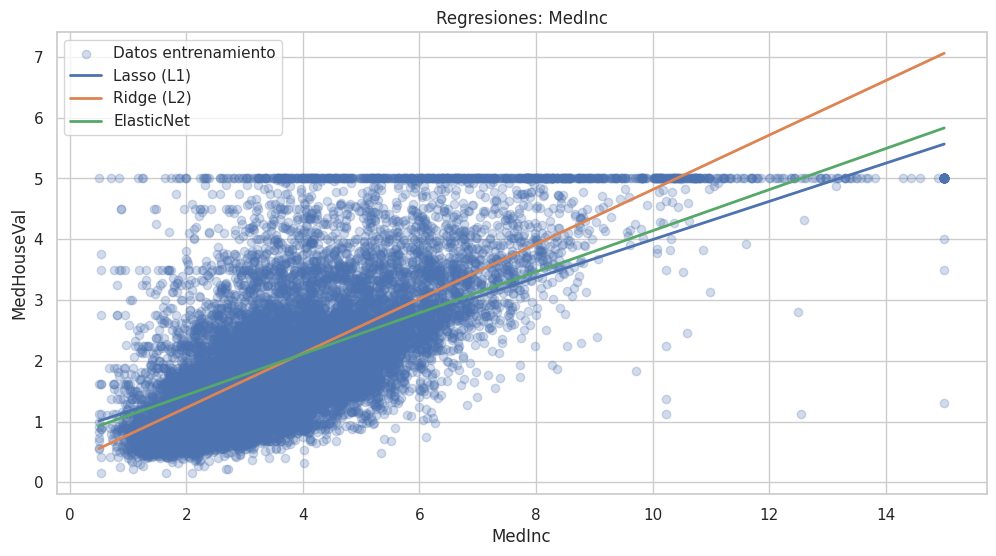

Lasso
  Non-zero coef count: 1
  Coefs: [ 0.59851956  0.         -0.         -0.         -0.         -0.
 -0.         -0.        ]

Ridge
  Non-zero coef count: 8
  Coefs: [ 0.85437179  0.1225618  -0.29437018  0.33920917 -0.00230261 -0.04082989
 -0.8967765  -0.86968745]

ElasticNet
  Non-zero coef count: 3
  Coefs: [ 0.64386711  0.08940862 -0.         -0.         -0.         -0.
 -0.01498904 -0.        ]



In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
feature = 'MedInc'                        # variable a plotear
feature_idx = independent_variables.index(feature)
n_points = 200                             # resolución de la línea

# 1) Rango en escala original para la variable
x_unscaled = np.linspace(independent_train[feature].min(),
                         independent_train[feature].max(),
                         n_points)

# 2) Construir matriz completa: filas con la media de cada feature
means = independent_train.mean().values    # array (n_features,)
X_plot_unscaled = np.tile(means, (n_points, 1))
X_plot_unscaled[:, feature_idx] = x_unscaled

# 3) Escalar (con el mismo scaler usado en entrenamiento)
X_plot_scaled = scaler.transform(X_plot_unscaled)

# 4) Predecir con cada modelo
y_lasso = lasso_model.predict(X_plot_scaled)
y_ridge = ridge_model.predict(X_plot_scaled)
y_enet  = elastic_net_model.predict(X_plot_scaled)

# 5) (Opcional) si el target estuvo escalado:
# y_lasso = y_target_scaler.inverse_transform(y_lasso.reshape(-1,1)).ravel()

# 6) Plot (x ya está ordenado)
plt.figure(figsize=(12,6))
plt.scatter(independent_train[feature], dependent_train, alpha=0.25, label='Datos entrenamiento')
plt.plot(x_unscaled, y_lasso, label='Lasso (L1)', linewidth=2)
plt.plot(x_unscaled, y_ridge, label='Ridge (L2)', linewidth=2)
plt.plot(x_unscaled, y_enet,  label='ElasticNet', linewidth=2)
plt.xlabel(feature)
plt.ylabel(dependent_variable)
plt.title(f'Regresiones: {feature}')
plt.legend()
plt.grid(True)
plt.show()

# 7) Imprimir coeficientes para comparar
for name, model in [('Lasso', lasso_model), ('Ridge', ridge_model), ('ElasticNet', elastic_net_model)]:
    print(name)
    print("  Non-zero coef count:", np.sum(model.coef_ != 0))
    print("  Coefs:", model.coef_)
    print()


¿Por qué mejora esto?

Las demás features están en valores plausibles (media), así la línea muestra el efecto marginal de MedInc manteniendo condiciones realistas.

x_unscaled está ordenado → las líneas son suaves y sin saltos.

Se imprimen coeficientes para ver cuántas variables “apagan” (coef = 0) Lasso.

5) Explicación matemática (simple) de Lasso, Ridge, ElasticNet

Regresión lineal clásica (mínimos cuadrados ordinarios) busca minimizar el error cuadrático:

$$
\underset{w}{\min}\;\sum\limits_{i}\left(y_{i} - X_{i}\,w\right)^{2}
$$




Ridge (L2) añade una penalización de cuadrados (reduce la magnitud de coeficientes, pero rara vez los pone exactamente en cero):

$$
\underset{w}{\min}\; \sum_{i}\left(y_{i} - X_{i}w\right)^{2} + \alpha \sum_{j}w_{j}^{2}
$$

	​


alpha grande → todos los coeficientes se encogen (más bias, menos varianza).

Lasso (L1) añade una penalización absoluta (favorece sparsity → coeficientes exactamente cero):

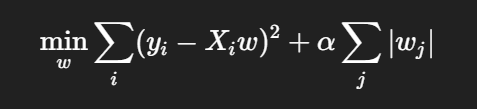

Lasso puede seleccionar variables (coef = 0) y por eso es útil cuando hay muchas variables.

ElasticNet mezcla ambas penalizaciones:

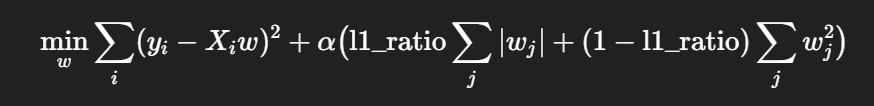



l1_ratio = 1.0 → ElasticNet ≈ Lasso, l1_ratio = 0.0 → ElasticNet ≈ Ridge.

Útil cuando hay muchas variables correlacionadas: Lasso a veces elige una sola; ElasticNet puede repartir peso entre ellas.

Intuición: L2 “encoge” coeficientes suavemente; L1 “recorta” y puede dejarlos a 0.

6) Cómo interpretar la gráfica final

El scatter muestra los puntos reales (MedInc vs target).

Cada línea muestra la predicción del modelo si tú solamente cambiaras MedInc y mantuvieras todo lo demás en valores “promedio”.

Si Lasso tiene una línea más plana o con menos pendiente que la regresión estándar → está penalizando esa variable.

Si Lasso pone a cero el coeficiente de MedInc, la línea será casi horizontal (predicción no depende de MedInc).

ElasticNet normalmente estará entre Lasso y Ridge en comportamiento.

7) Consejos prácticos finales

Siempre escalara features antes de usar penalizaciones (Ridge/Lasso/ElasticNet). Ya lo haces con scaler.

Para elegir alpha y l1_ratio usa validación cruzada: LassoCV, RidgeCV, ElasticNetCV o GridSearchCV.

Mira np.sum(model.coef_ != 0) para ver cuántas variables mantiene Lasso.

Si quieres ver el efecto real de MedInc sin el sesgo de fijar todo a la media, puedes usar partial dependence plots (sklearn plot_partial_dependence / PartialDependenceDisplay) o permutaciones.

9. **Comparación de resultados y explicacion**
Aqui vemos una comparación de los resultados de cada una de las regresiones y las variables independientes que se descartan o "encogen" para cada uno de los métodos.

In [9]:
import pandas as pd

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame(index=independent_variables)

# Add the coefficients from each model to the DataFrame
coefficients_df['Lasso'] = lasso_model.coef_
coefficients_df['Ridge'] = ridge_model.coef_
coefficients_df['Elastic-Net'] = elastic_net_model.coef_

# Print the coefficients DataFrame
print("Comparison of Model Coefficients:")
display(coefficients_df)

# Identify variables with coefficients of exactly zero in Lasso and Elastic-Net
lasso_discarded_variables = coefficients_df[coefficients_df['Lasso'] == 0].index.tolist()
elastic_net_discarded_variables = coefficients_df[coefficients_df['Elastic-Net'] == 0].index.tolist()

print("\nVariables discarded by Lasso (coefficient == 0):")
if lasso_discarded_variables:
    print(lasso_discarded_variables)
else:
    print("No variables were discarded by Lasso.")

print("\nVariables discarded by Elastic-Net (coefficient == 0):")
if elastic_net_discarded_variables:
    print(elastic_net_discarded_variables)
else:
    print("No variables were discarded by Elastic-Net.")

# Explanation of coefficient comparison and discarding
print("\nExplanation of Coefficient Comparison:\n")
print("Ridge regression shrinks all coefficients towards zero but does not set any exactly to zero.")
print("Lasso regression (L1 regularization) can set some coefficients exactly to zero, effectively performing variable selection.")
if lasso_discarded_variables:
    print(f"In this case, Lasso discarded the following variables by setting their coefficients to zero: {lasso_discarded_variables}")
else:
    print("In this case, Lasso did not set any coefficients exactly to zero.")
print("Elastic-Net regression combines L1 and L2 regularization.")
print("It performs both coefficient shrinkage (like Ridge) and can set some coefficients to zero (like Lasso).")
if elastic_net_discarded_variables:
     print(f"Elastic-Net discarded the following variables by setting their coefficients to zero: {elastic_net_discarded_variables}")
else:
    print("In this case, Elastic-Net did not set any coefficients exactly to zero.")
print("The L1 penalty in Lasso and Elastic-Net promotes sparsity, leading to some coefficients becoming exactly zero.")
print("The L2 penalty in Ridge and Elastic-Net shrinks coefficients but typically does not force them to zero.")

Comparison of Model Coefficients:


,Lasso,Ridge,Elastic-Net
MedInc,0.59852,0.854372,0.643867
HouseAge,0.00000,0.122562,0.089409
AveRooms,-0.00000,-0.294370,-0.000000
AveBedrms,-0.00000,0.339209,-0.000000
Population,-0.00000,-0.002303,-0.000000
AveOccup,-0.00000,-0.040830,-0.000000
Latitude,-0.00000,-0.896776,-0.014989
Longitude,-0.00000,-0.869687,-0.000000



Variables discarded by Lasso (coefficient == 0):
['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Variables discarded by Elastic-Net (coefficient == 0):
['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']

Explanation of Coefficient Comparison:

Ridge regression shrinks all coefficients towards zero but does not set any exactly to zero.
Lasso regression (L1 regularization) can set some coefficients exactly to zero, effectively performing variable selection.
In this case, Lasso discarded the following variables by setting their coefficients to zero: ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Elastic-Net regression combines L1 and L2 regularization.
It performs both coefficient shrinkage (like Ridge) and can set some coefficients to zero (like Lasso).
Elastic-Net discarded the following variables by setting their coefficients to zero: ['AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'L

10. **Ejecutar los modelos entrenados con los datos de prueba**
Aqui vamos a ejecutar los modelos ya entrenados con los datos de pueba y calcularemos el error cuadrático medio (MSE) para compararlos.

In [10]:
from sklearn.metrics import mean_squared_error
# Make predictions on the scaled test set using the tuned models
dependent_variable_pred_lasso = lasso_model.predict(independent_test_scaled)
dependent_variable_pred_ridge = ridge_model.predict(independent_test_scaled)
dependent_variable_pred_elastic_net = elastic_net_model.predict(independent_test_scaled)

# Calculate and print the Mean Squared Error (MSE) for each model
mse_ridge = mean_squared_error(dependent_test, dependent_variable_pred_ridge)
mse_lasso = mean_squared_error(dependent_test, dependent_variable_pred_lasso)
mse_elastic_net = mean_squared_error(dependent_test, dependent_variable_pred_elastic_net)

print("Model Performance on the Test Set with arbitrary values for alpha y ratio:\n")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Elastic-Net Regression MSE: {mse_elastic_net:.4f}")

Model Performance on the Test Set with arbitrary values for alpha y ratio:

Lasso Regression MSE: 0.7429
Ridge Regression MSE: 0.5559
Elastic-Net Regression MSE: 0.6978


11.  **Optimización de Hiperparámetros:**
    *   La efectividad de la regularización depende de la elección de `alpha`. Se utiliza validación cruzada (con `RidgeCV`, `LassoCV`, `ElasticNetCV`) para encontrar de forma automática el valor óptimo que minimiza el error en datos no vistos, garantizando el mejor rendimiento posible.


In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Define parameter grid for Lasso
param_grid_lasso = {'alpha': [ 0.01, 0.1, 1, 10, 100]}

# Define parameter grid for Ridge
param_grid_ridge = {'alpha': [ 0.01, 0.1, 1, 10, 100]}


# Define parameter grid for Elastic-Net
param_grid_elastic_net = {'alpha': [ 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9]}

print("Parameter grids defined:")
print("Lasso:", param_grid_lasso)
print("Ridge:", param_grid_ridge)
print("Elastic-Net:", param_grid_elastic_net)

# Instantiate and fit GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(independent_train_scaled, dependent_train)

# Instantiate and fit GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
grid_search_ridge.fit(independent_train_scaled, dependent_train)

# Instantiate and fit GridSearchCV for Elastic-Net
grid_search_elastic_net = GridSearchCV(ElasticNet(random_state=42), param_grid_elastic_net, cv=5)
grid_search_elastic_net.fit(independent_train_scaled, dependent_train)

# Print the best hyperparameters
print("\nBest hyperparameters for Lasso:", grid_search_lasso.best_params_)
print("Best hyperparameters for Ridge:", grid_search_ridge.best_params_)
print("Best hyperparameters for Elastic-Net:", grid_search_elastic_net.best_params_)

# Create a DataFrame to store the coefficients
coefficients_df = pd.DataFrame(index=independent_variables)

Parameter grids defined:
Lasso: {'alpha': [0.01, 0.1, 1, 10, 100]}
Ridge: {'alpha': [0.01, 0.1, 1, 10, 100]}
Elastic-Net: {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}



Best hyperparameters for Lasso: {'alpha': 0.01}
Best hyperparameters for Ridge: {'alpha': 0.01}
Best hyperparameters for Elastic-Net: {'alpha': 0.01, 'l1_ratio': 0.1}


12.  **Comparación y Visualización de Resultados:** Se muestra los valores de MSE para los modelos con hiperparametros aleatorios y con hiperametros optimizados. Se observa que la MSE es muy similar para todos los modelos con los hiperparametros optimizados.

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error

# Instantiate and fit Lasso model with best hyperparameters
best_lasso_alpha = grid_search_lasso.best_params_['alpha']
lasso_model_tuned = Lasso(alpha=best_lasso_alpha)
lasso_model_tuned.fit(independent_train_scaled, dependent_train)

# Instantiate and fit Ridge model with best hyperparameters
best_ridge_alpha = grid_search_ridge.best_params_['alpha']
ridge_model_tuned = Ridge(alpha=best_ridge_alpha)
ridge_model_tuned.fit(independent_train_scaled, dependent_train)

# Instantiate and fit ElasticNet model with best hyperparameters
best_elastic_net_alpha = grid_search_elastic_net.best_params_['alpha']
best_elastic_net_l1_ratio = grid_search_elastic_net.best_params_['l1_ratio']
elastic_net_model_tuned = ElasticNet(alpha=best_elastic_net_alpha, l1_ratio=best_elastic_net_l1_ratio, random_state=42)
elastic_net_model_tuned.fit(independent_train_scaled, dependent_train)

# Create a DataFrame to store the coefficients
coefficients_tuned_df = pd.DataFrame(index=independent_variables)

# Add the coefficients from each model to the DataFrame
coefficients_tuned_df['Lasso'] = lasso_model_tuned.coef_
coefficients_tuned_df['Ridge'] = ridge_model_tuned.coef_
coefficients_tuned_df['Elastic-Net'] = elastic_net_model_tuned.coef_

display(coefficients_tuned_df)

# Print the coefficients of the tuned models
print("\nTuned Lasso Model Coefficients:")
print(lasso_model_tuned.coef_)

print("Tuned Ridge Model Coefficients:")
print(ridge_model_tuned.coef_)

print("\nTuned Elastic-Net Model Coefficients:")
print(elastic_net_model_tuned.coef_)

# Make predictions on the scaled test set using the tuned models
dependent_variable_pred_lasso = lasso_model_tuned.predict(independent_test_scaled)
dependent_variable_pred_ridge = ridge_model_tuned.predict(independent_test_scaled)
dependent_variable_pred_elastic_net = elastic_net_model_tuned.predict(independent_test_scaled)

# Calculate and print the Mean Squared Error (MSE) for each model
mse_lasso_tuned = mean_squared_error(dependent_test, dependent_variable_pred_lasso)
mse_ridge_tuned = mean_squared_error(dependent_test, dependent_variable_pred_ridge)
mse_elastic_net_tuned = mean_squared_error(dependent_test, dependent_variable_pred_elastic_net)

print("\nModel Performance on the Test Set (Tuned Models):")
print(f"Lasso Regression (Tuned) MSE: {mse_lasso_tuned:.4f}")
print(f"Ridge Regression (Tuned) MSE: {mse_ridge_tuned:.4f}")
print(f"Elastic-Net Regression (Tuned) MSE: {mse_elastic_net_tuned:.4f}")

print("\nModel Performance on the Test Set with arbitrary values for alpha y ratio:\n")
print(f"Lasso Regression MSE: {mse_lasso:.4f}")
print(f"Ridge Regression MSE: {mse_ridge:.4f}")
print(f"Elastic-Net Regression MSE: {mse_elastic_net:.4f}")


,Lasso,Ridge,Elastic-Net
MedInc,0.800957,0.854382,0.839904
HouseAge,0.127087,0.122547,0.132326
AveRooms,-0.162759,-0.294408,-0.253360
AveBedrms,0.206207,0.339257,0.291538
Population,-0.000000,-0.002307,0.000000
AveOccup,-0.030602,-0.040829,-0.040126
Latitude,-0.790113,-0.896921,-0.788772
Longitude,-0.755674,-0.869834,-0.759487



Tuned Lasso Model Coefficients:
[ 0.80095744  0.12708701 -0.16275931  0.20620745 -0.         -0.03060176
 -0.79011254 -0.75567379]
Tuned Ridge Model Coefficients:
[ 0.85438247  0.12254702 -0.29440814  0.33925697 -0.00230747 -0.04082914
 -0.89692126 -0.86983406]

Tuned Elastic-Net Model Coefficients:
[ 0.83990353  0.13232569 -0.25336039  0.2915384   0.         -0.04012579
 -0.78877249 -0.75948682]

Model Performance on the Test Set (Tuned Models):
Lasso Regression (Tuned) MSE: 0.5483
Ridge Regression (Tuned) MSE: 0.5559
Elastic-Net Regression (Tuned) MSE: 0.5519

Model Performance on the Test Set with arbitrary values for alpha y ratio:

Lasso Regression MSE: 0.7429
Ridge Regression MSE: 0.5559
Elastic-Net Regression MSE: 0.6978


13. **Mejora del MSE usando hiperparametros optimizados** Esta gráfica muestra la mejore del MSE para los tres modelos cuando se usan hiperparametros optimizados. Como observación, el modelo Ridge (L2) no experimenta ninguna mejora.

/tmp/ipykernel_4026/1382855378.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=model_names, y=improvements, palette='viridis')


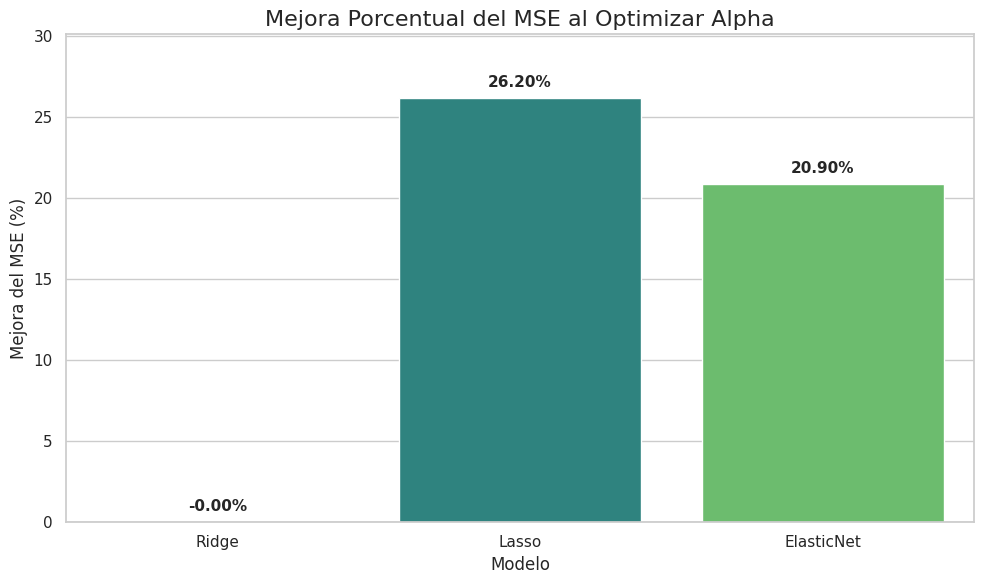

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Cálculo de la Mejora Porcentual ---
# Fórmula: ((Error_Inicial - Error_Final) / Error_Inicial) * 100
improvement_ridge = ((mse_ridge - mse_ridge_tuned) / mse_ridge) * 100
improvement_lasso = ((mse_lasso - mse_lasso_tuned) / mse_lasso) * 100
improvement_elastic_net = ((mse_elastic_net - mse_elastic_net_tuned) / mse_elastic_net) * 100

improvements = [improvement_ridge, improvement_lasso, improvement_elastic_net]
model_names = ['Ridge', 'Lasso', 'ElasticNet']

# --- 3. Creación del Gráfico de Barras ---
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Usamos seaborn para un estilo más agradable
ax = sns.barplot(x=model_names, y=improvements, palette='viridis')

# Añadir etiquetas y título
ax.set_xlabel("Modelo", fontsize=12)
ax.set_ylabel("Mejora del MSE (%)", fontsize=12)
ax.set_title("Mejora Porcentual del MSE al Optimizar Alpha", fontsize=16)

# Añadir los valores porcentuales sobre cada barra
for index, value in enumerate(improvements):
    # Colocamos el texto ligeramente por encima de la barra
    plt.text(x=index, y=value + 0.5, s=f'{value:.2f}%', ha='center', va='bottom', fontsize=11, weight='bold')

# Añadir una línea en y=0 como referencia
ax.axhline(0, color='grey', linewidth=0.8)

# Ajustar los límites del eje Y para dar espacio a las etiquetas
plt.ylim(0, max(improvements) * 1.15)

plt.tight_layout()
plt.show()
